# Rug plot

A rug plot is a plot of data for a single quantitative variable, displayed as marks along an axis.

It is used to visualize the distribution of the data.

As such it is analogous to a histogram with zero-width bins, or a one-dimensional scatter plot.

Rug plots are often used in combination with two-dimensional scatter plots by placing a rug plot of the $x$ values of the data along the x-axis, and similarly for the $y$ values.

This is the origin of the term "rug plot", as these rug plots with perpendicular markers look like tassels along the edges of the rectangular "rug" of the scatter plot.

In [2]:
from scipy import stats

import matplotlib.pyplot as plt
import numpy as np

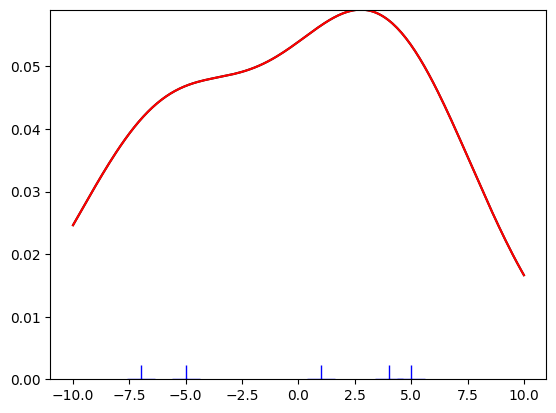

In [6]:
x1 = np.array([-7, -5, 1, 4, 5], dtype=float)
kde1 = stats.gaussian_kde(x1)
kde2 = stats.gaussian_kde(x1, bw_method="silverman")

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x1, np.zeros(x1.shape), 'b+', ms=20)
x_eval = np.linspace(-10, 10, num=200)
ax.set_ylim([0, max(kde1(x_eval))])
ax.plot(x_eval, kde1(x_eval), 'k-', label="Scott's Rule")
ax.plot(x_eval, kde1(x_eval), 'r-', label="Silverman's Rule")

plt.show()

In [7]:
def my_kde_bandwidth(obj, fac=1./5):
    return np.power(obj.n, -1./(obj.d+4)) * fac

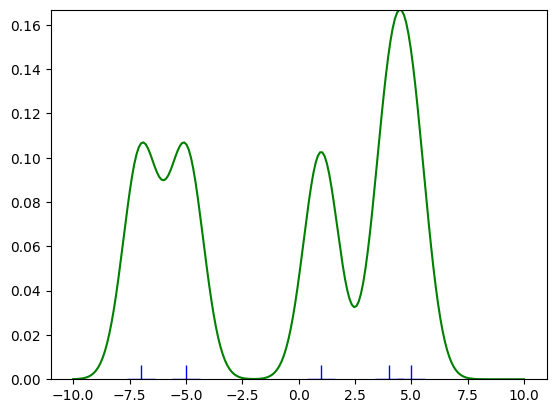

In [9]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.plot(x1, np.zeros(x1.shape), 'b+', ms=20)
kde3 = stats.gaussian_kde(x1, bw_method=my_kde_bandwidth)
ax.plot(x_eval, kde3(x_eval), 'g-', label="With smaller BW")
ax.set_ylim([0, max(kde3(x_eval))])

plt.show()

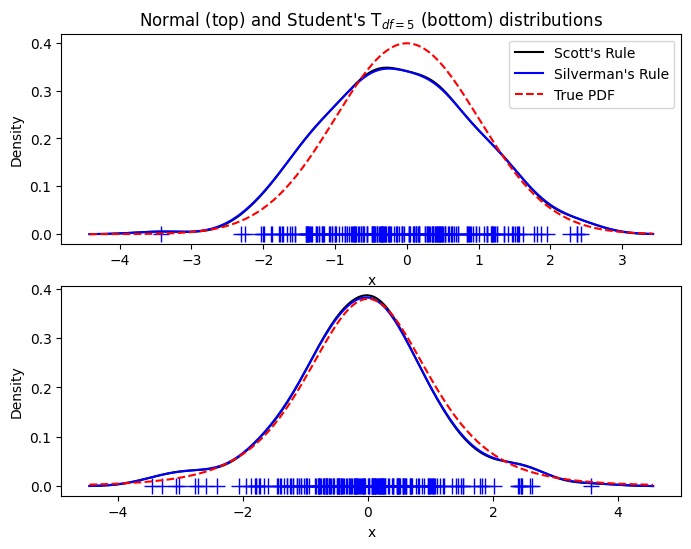

In [10]:
np.random.seed(12456)

x1 = np.random.normal(size=200)
xs = np.linspace(x1.min() - 1, x1.max() + 1, 200)

kde1 = stats.gaussian_kde(x1)
kde2 = stats.gaussian_kde(x1, bw_method="silverman")

fig = plt.figure(figsize=(8, 6))

ax1 = fig.add_subplot(211)
ax1.plot(x1, np.zeros(x1.shape), 'b+', ms=12)
ax1.plot(xs, kde1(xs), 'k-', label="Scott's Rule")
ax1.plot(xs, kde2(xs), 'b-', label="Silverman's Rule")
ax1.plot(xs, stats.norm.pdf(xs), 'r--', label="True PDF")

ax1.set_xlabel('x')
ax1.set_ylabel('Density')
ax1.set_title("Normal (top) and Student's T$_{df=5}$ (bottom) distributions")
ax1.legend(loc=1)

x2 = stats.t.rvs(5, size=200)
xs = np.linspace(x2.min() - 1, x2.max() + 1, 200)

kde3 = stats.gaussian_kde(x2)
kde4 = stats.gaussian_kde(x2, bw_method="silverman")

ax2 = fig.add_subplot(212)
ax2.plot(x2, np.zeros(x2.shape), 'b+', ms=12)
ax2.plot(xs, kde3(xs), 'k-', label="Scott's Rule")
ax2.plot(xs, kde4(xs), 'b-', label="Silverman's Rule")
ax2.plot(xs, stats.t.pdf(xs, 5), 'r--', label="True PDF")

ax2.set_xlabel('x')
ax2.set_ylabel('Density')

plt.show()

In [11]:
from functools import partial

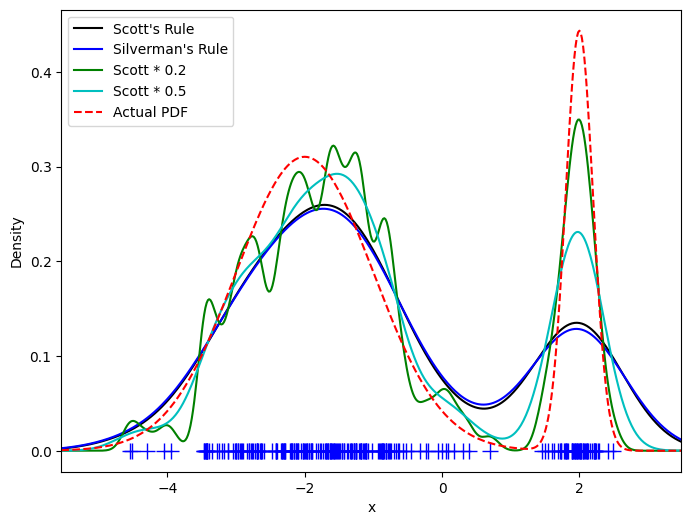

In [12]:
loc1, scale1, size1 = (-2, 1, 175)
loc2, scale2, size2 = (2, 0.2, 50)

x2 = np.concatenate([np.random.normal(loc=loc1, scale=scale1, size=size1),
                     np.random.normal(loc=loc2, scale=scale2, size=size2)])

x_eval = np.linspace(x2.min() - 1, x2.max() + 1, 500)

kde = stats.gaussian_kde(x2)
kde2 = stats.gaussian_kde(x2, bw_method="silverman")
kde3 = stats.gaussian_kde(x2, bw_method=partial(my_kde_bandwidth, fac=0.2))
kde4 = stats.gaussian_kde(x2, bw_method=partial(my_kde_bandwidth, fac=0.5))

pdf = stats.norm.pdf

bimodal_pdf = pdf(x_eval, loc=loc1, scale=scale1) * float(size1) / x2.size + \
                pdf(x_eval, loc=loc2, scale=scale2) * float(size2) / x2.size

fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(111)
ax.plot(x2, np.zeros(x2.shape), 'b+', ms=12)
ax.plot(x_eval, kde(x_eval), 'k-', label="Scott's Rule")
ax.plot(x_eval, kde2(x_eval), 'b-', label="Silverman's Rule")
ax.plot(x_eval, kde3(x_eval), 'g-', label="Scott * 0.2")
ax.plot(x_eval, kde4(x_eval), 'c-', label="Scott * 0.5")
ax.plot(x_eval, bimodal_pdf, 'r--', label="Actual PDF")

ax.set_xlim([x_eval.min(), x_eval.max()])
ax.legend(loc=2)
ax.set_xlabel('x')
ax.set_ylabel('Density')

plt.show()